In [ ]:
pwd

# NLP Applications - Sentiment Analysis on Movie Reviews

*   Course: IST 664
*   Authors: Sathish Kumar Rajediran, Quinn E Knudsen
*   Task: Final Project
*   Task Item: Classify the sentiment of sentences from the movie reviews dataset using NLTK Python
*   Date: December 12,2020

## Introduction
   In today's world, large amount of data is generated in unstructured  format. This requires processing in order to explore insights and make data driven decisions.Often, these data are collected from web articles, social media posts, podcasts, surveys, search history etc. The process of analyzing natural language and making sense out of it falls under the field of Natural Language Processing (NLP). 
    
   Sentiment Analysis is a common NLP task, can be used to identify and extract opinions by classifying texts or part of texts especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral

## Objective
In this project, Our objective is to classify the movie reviews as either positive or negative from the Kaggle movie reviews dataset using NLTK libraries in Python.
It involves, Data collection, Pre-processing, Feature engineering, and experimentation using NLTK classifier algorithms.

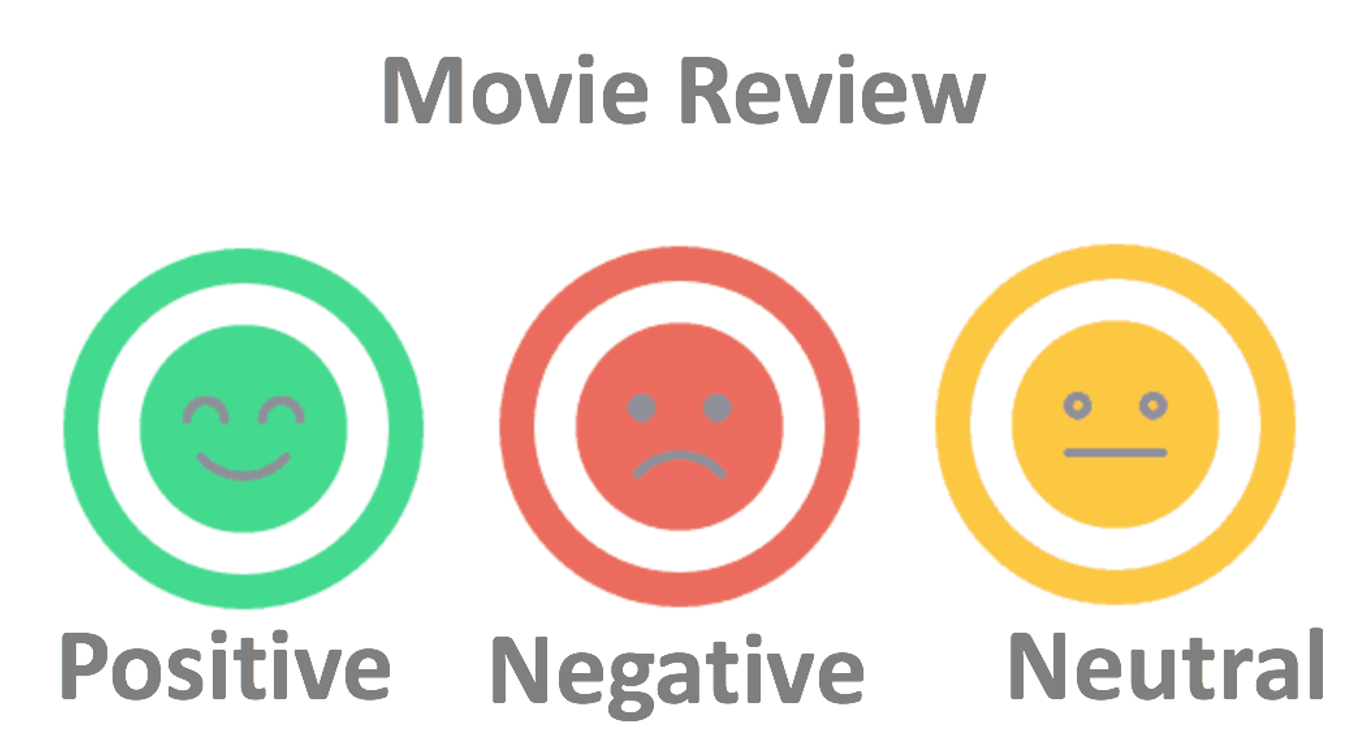

## NLTK Python library
NLTK stands for Natural Language Toolkit. It is a powerful Python package that provides a set of diverse natural languages algorithms. It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. NLTK helps the computer to analysis, preprocess, and understand the written text.

## Process Overview
Below, picture shows the overall process involved in this project

## NLTK Text Analytics
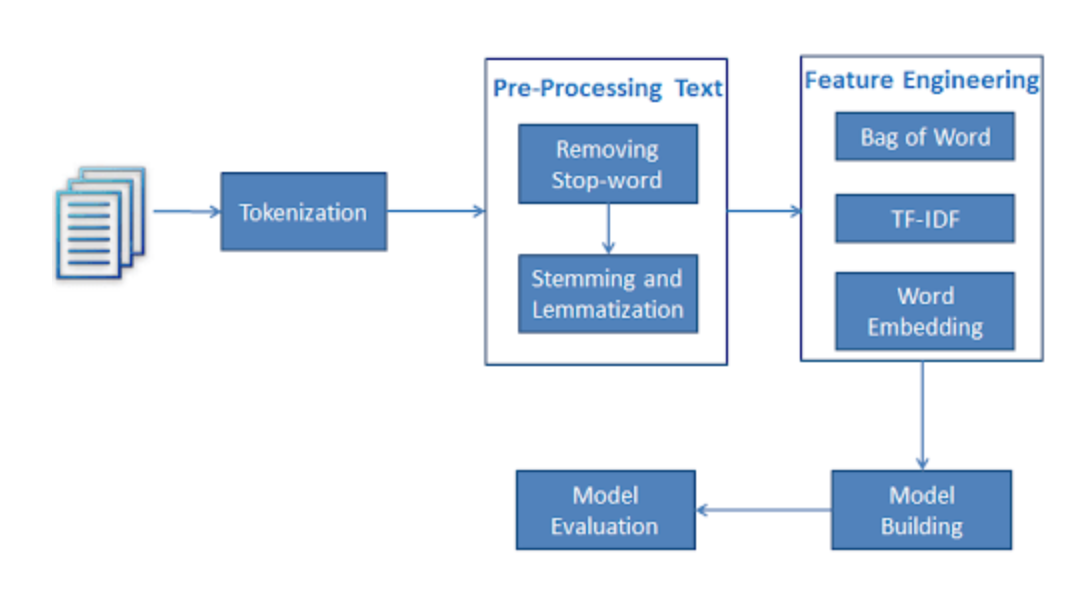

## Experimentation
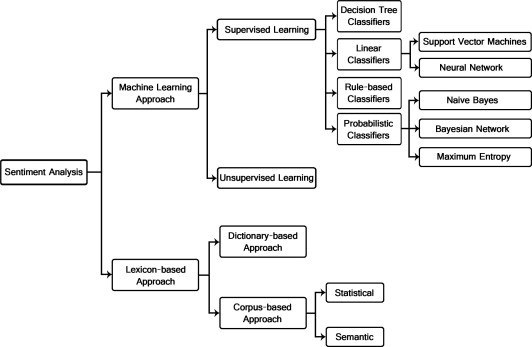

## Data Source(s)

* Kaggle dataset: 
   The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

   *  train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a 
      SentenceId  so that you can track which phrases belong to a single sentence.
      
   * test.tsv contains just phrases. You must assign a sentiment label to each phrase.
   
   * The sentiment labels are:
        * 0 - negative
        * 1 - somewhat negative
        * 2 - neutral
        * 3 - somewhat positive
        * 4 - positive
        
  https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In addition, we may as well validate other datasets on the pre-trained models for further modeling and improvements. Datasets may include,
    
* Cornell’s movie review data for use in sentiment analysis, organized into sentiment polarity, sentiment scale and subjectivity sections.
http://www.cs.cornell.edu/people/pabo/movie-review-data/

* IMDB movie review data from Stanford - containing 50,000 reviews, this dataset is split equally into 25,000 training and 25,000 test sets. It also provides unannotated data as well.
http://ai.stanford.edu/~amaas/data/sentiment/


## Pre Processing
   This step involves loading and cleaning the data for text classification.
* Import libraries
* Loading the data
* Tokenization
    * Tokenize Sentence
    * Tokenize Words
* Removing Stop words
* Frequency Distribution
* Normalization
    * Stemming
    * Lemmatization
    * Bigrams
    * PMI
* POS Tagging
   


### Import Libraries

In [1]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import timeit


##  Regular Expression to match non-alphabetic characters
import re

# csv, xls, pandas & json
import pandas as pd
import json
import csv
import numpy as np

# Language Processing
import random
import nltk
from nltk import FreqDist
# import wordnet and shorten its name to wn
from nltk.corpus import wordnet as wn
from nltk import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

#visualization
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

%matplotlib inline

print('Libraries imported successfully!\n')

os.getcwd()

Libraries imported successfully!



'/Users/sathishrajendiran/ist664-nlp/FinalProject'

### Loading the data
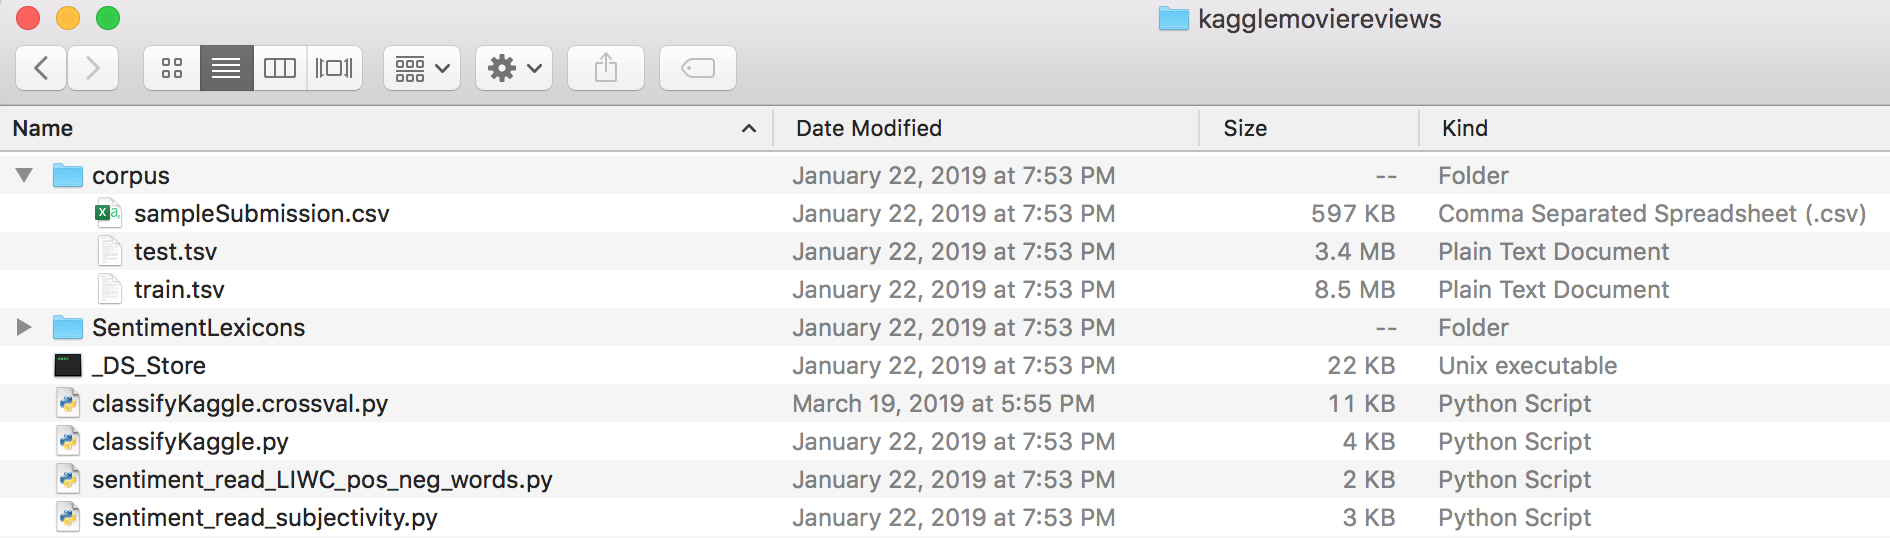

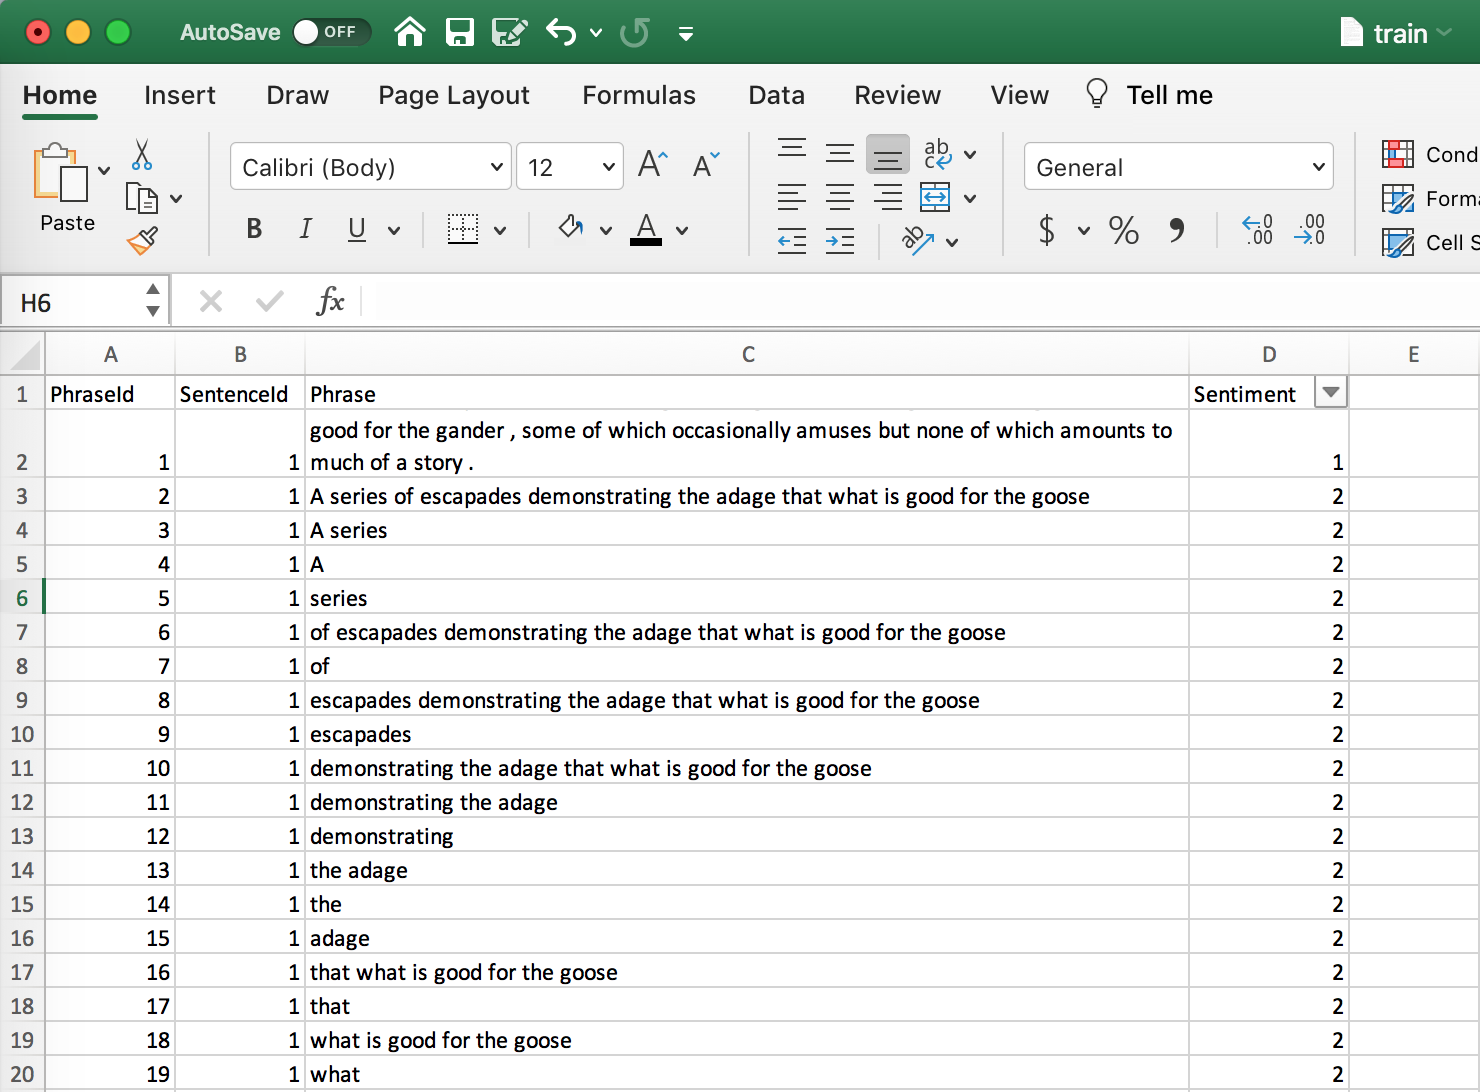

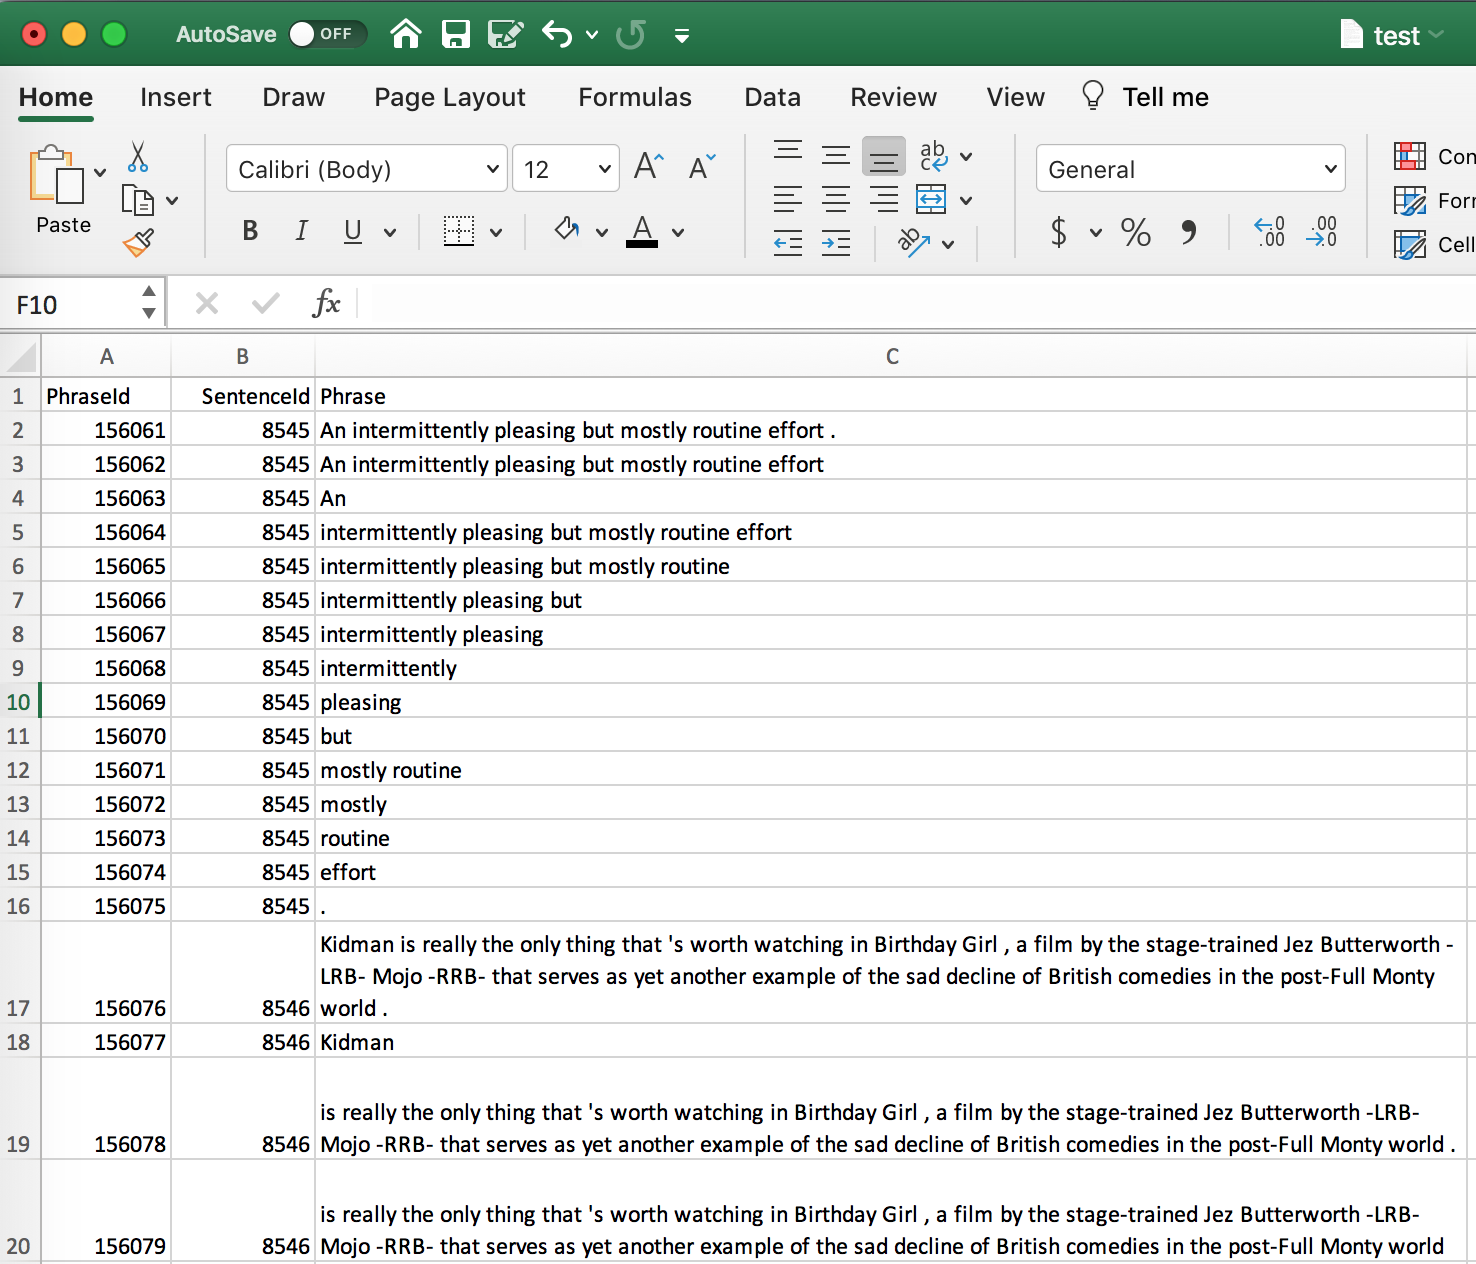

In [2]:
# Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# ***********************************************************************************
#       Working with files  
# ***********************************************************************************

# Read the train and test tsv files from the corpus folder into dataframes

# !pwd

try: 
    train = pd.read_csv("kagglemoviereviews/corpus/train.tsv",sep="\t")
    print('Train data - Total Number of rows Processed: ',len(train))
except:
    print("Is the file in correct directory?")
    
try: 
    test = pd.read_csv("kagglemoviereviews/corpus/test.tsv",sep="\t")
    print('Train data - Total Number of rows Processed: ',len(test))
except:
    print("Is the file in correct directory?")

Train data - Total Number of rows Processed:  156060
Train data - Total Number of rows Processed:  66292


### Data Dictionary

In [ ]:
# review data types of train dataset
train.dtypes

In [ ]:
# review data types of train dataset
test.dtypes

In [ ]:
# confirm there are no NULL values in the dataset
pd.isnull(train).sum()

In [ ]:
# confirm there are no NULL values in the dataset
pd.isnull(test).sum()

In [ ]:
#Analyze Dataframe  - metadata
train.info()

#Analyze Dataframe - shape
train.shape

#Analyze Dataframe - top 5 rows
train.head()

In [ ]:
#Analyze Dataframe  - metadata
test.info()

#Analyze Dataframe - shape
test.shape

#Analyze Dataframe - top 5 rows
test.head()

In [ ]:
# ***********************************************************************************
#       Analyze sentiments 
# ***********************************************************************************

# prepare seaparate datasets for positive(pos),negative(neg) and neutral(neu) sentiments
train_pos = train.loc[train['Sentiment'].isin([3,4])]
train_neu = train.loc[train['Sentiment'].isin([2])]
train_neg = train.loc[train['Sentiment'].isin([0,1])]

# review the sentiments by count
print('Number of Postive Sentiment: ',len(train_pos))
print('Number of Neutral Sentiment: ',len(train_neu))
print('Number of Negative Sentiment: ',len(train_neg),"\n")
print('Percentage of positive Sentiment {}%'.format(round((len(train_pos))/len(train)*100,2)))
print('Percentage of neutral Sentiment {}%'.format(round((len(train_neu))/len(train)*100,2)))
print('Percentage of negative Sentiment {}%'.format(round((len(train_neg))/len(train)*100,2)))

#plot the summary
plt.rcParams['figure.figsize'] = (13, 7)
sns.countplot(train["Sentiment"], palette='rocket')
plt.title('Sentiment Score in Training Dataset', fontsize = 20)

In [ ]:
# # review positive sentiments
# train_pos.head()

In [ ]:
# # review neutral sentiments
# train_neu.head()

In [ ]:
# # review negative sentiments
# train_neg.head()

## Tokenization

Tokenization is the process of breaking down chunks of text into smaller pieces. NLTK comes with a default processing pipeline that begins with tokenization, making this process a snap. In NLTK, you can do either sentence tokenization or word tokenization.Token is a single entity that is building blocks for sentence or paragraph.

 * Word tokenization breaks text down into individual words.
 * Senence tokenization breaks text down into individual sentences.

In [ ]:
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [ ]:
def Preprocess(df):

    for i in df['Phrase']:
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        i = tokenizer.tokenize(i)
        
#------------------------------------------------------------------------------------------------
        
    tokenized_review_1 = df['Phrase'].apply(lambda x: x.split())
#------------------------------------------------------------------------------------------------
    ps = PorterStemmer()
    WL = WordNetLemmatizer()

    stemmed_review = tokenized_review_1.apply(lambda x: [ps.stem(i) for i in x])
    lemmatized_review = tokenized_review_1.apply(lambda x: [WL.lemmatize(i) for i in x])
#------------------------------------------------------------------------------------------------
    stop = stopwords.words('english')
    morestopwords = ['could','would','might','must','need','sha','wo','y',"'s","'d","'ll"
                     ,"'t","'m","'re","'ve", "n't",'wa','gon','na']
    stop = stop + morestopwords 
    stemmed_review = stemmed_review.apply(lambda x: [item for item in x if item not in stop])
    lemmatized_review = lemmatized_review.apply(lambda x: [item for item in x if item not in stop])
    
    #Add in negation 
#------------------------------------------------------------------------------------------------

    for i in range(len(stemmed_review)):
        stemmed_review[i] = ' '.join(stemmed_review[i])

    df['stemmed_review'] = stemmed_review

    
    for i in range(len(lemmatized_review)):
        lemmatized_review[i] = ' '.join(lemmatized_review[i])

    df['lemmatized_review'] = lemmatized_review
    df = df[df["stemmed_review"] != '']
    df = df[df["lemmatized_review"] != '']

In [ ]:
# pre-processing train data
starttime = timeit.default_timer()
print("The start time is :",starttime)

try: 
    Preprocess(train)
    print("pre-processing completed.")
    
except AttributeError as e:
    print("Oops..! something went wrong!\n")
    print(e)

print("The time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

In [ ]:
train.head()

In [ ]:
# pre-processing test data
starttime = timeit.default_timer()
print("The start time is :",starttime)

try: 
    Preprocess(test)
    print("pre-processing completed.")
    
except AttributeError as e:
    print("Oops..! something went wrong!\n")
    print(e)

print("The time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

In [ ]:
test.head()

In [ ]:
# ***********************************************************************************
#       Analyze sentiments 
# ***********************************************************************************
positive_words = train[train["Sentiment"] !=  0 ]
positive_words = positive_words[positive_words["Sentiment"] !=  1 ]
positive_words = positive_words[positive_words["Sentiment"] !=  2 ]

negative_words = train[train["Sentiment"] !=  3 ]
negative_words = negative_words[negative_words["Sentiment"] !=  4 ]
negative_words = negative_words[negative_words["Sentiment"] !=  2 ]

positive_words.head()

In [ ]:
negative_words.head()

In [ ]:
#plot the summary
plt.rcParams['figure.figsize'] = (13, 7)
sns.countplot(train["Sentiment"], palette='rocket')
plt

In [ ]:
# tokenize by the regular word tokenizer
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(train["lemmatized_review"]))
filetokens = nltk.word_tokenize(letters_only)

# choose to treat upper and lower case the same
#    by putting all tokens in lower case
filewords = [w.lower() for w in filetokens]

In [ ]:
letters_only

In [ ]:
data = train["lemmatized_review"]
print(data)

In [ ]:
len(data)

In [ ]:
filetokens = nltk.word_tokenize(data[100])

# choose to treat upper and lower case the same
#    by putting all tokens in lower case
filewords = [w.lower() for w in filetokens]

In [ ]:
len(filewords)

In [ ]:
# setup to process bigrams
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
finder = BigramCollocationFinder.from_words(filetokens)
# choose to use both the non-alpha word filter and a stopwords filter
finder.apply_word_filter(alpha_filter)

In [ ]:
# score by frequency and display the top 50 bigrams
scored = finder.score_ngrams(bigram_measures.raw_freq)
print ()
print ("Bigrams from file with top 50 frequencies")
for item in scored[:50]:
        print (item)

In [ ]:
# to get good results, must first apply frequency filter
finder.apply_freq_filter(5)
scored = finder.score_ngrams(bigram_measures.pmi)
print ("Bigrams from file with top 50 by Mutual Information:")
for bscore in scored[:50]:
    print (bscore)

## Data Analysis & Visualization

In [ ]:
# Python program to generate WordCloud for the positive words

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


df_pos = positive_words

comment_words = '' 
custom_stopwords = ["movie","film","one","ha","story","make","doe","lrb","rrb"]
stopwords = set(STOPWORDS).union(custom_stopwords) 


# iterate through the file 
for val in df_pos.lemmatized_review:
# typecaste each val to string 
    val = str(val) 

# split the value 
    tokens = val.split() 

# Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
    background_color ='white', 
    stopwords = stopwords, 
    min_font_size = 10).generate(comment_words) 

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Positive Words", fontsize=60)
plt.show() 


In [ ]:
# Python program to generate WordCloud for the positive words

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


df_neg = negative_words

comment_words = '' 
custom_stopwords = ["movie","film","one","ha","story","make","doe","lrb","rrb"]
stopwords = set(STOPWORDS).union(custom_stopwords) 

# iterate through the file 
for val in df_neg.lemmatized_review:
# typecaste each val to string 
    val = str(val) 

# split the value 
    tokens = val.split() 

# Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
    background_color ='white', 
    stopwords = stopwords, 
    min_font_size = 10).generate(comment_words) 

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Negative Words", fontsize=60)
plt.show() 


## Feature Engineering

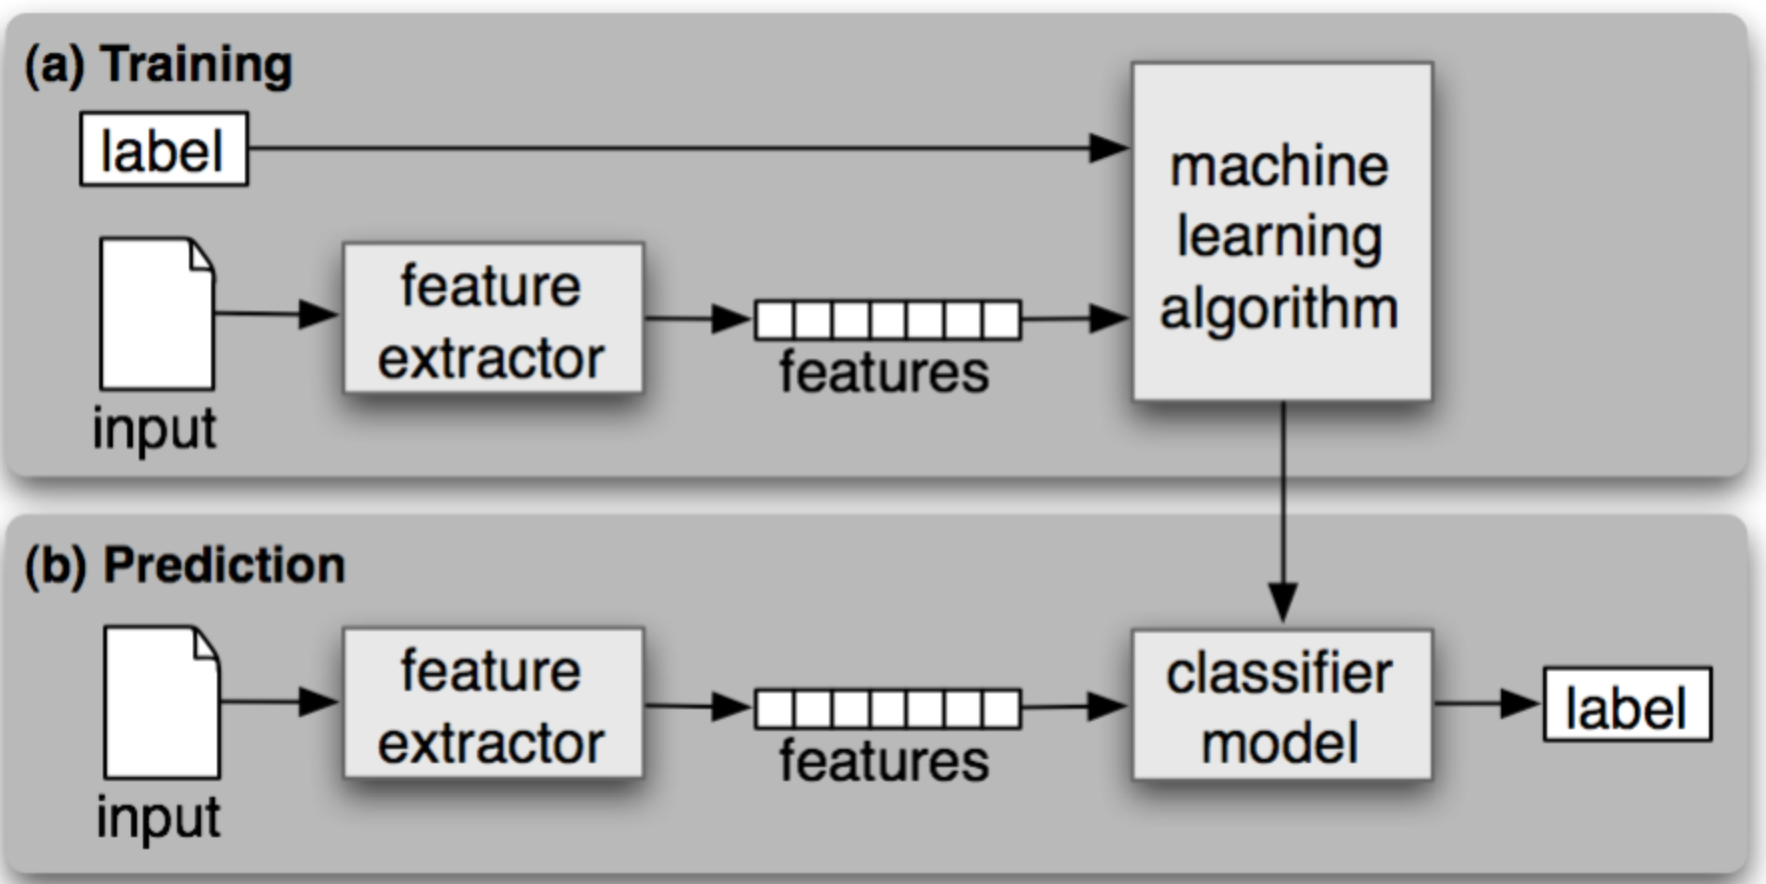

In [ ]:
train["Sentiment"].value_counts()

In [ ]:
test.head()

## Experimentation

In [ ]:
# NB_data = pd.concat([train, test], ignore_index=True)
NB_data = train

In [ ]:
NB_data.head()

In [ ]:
NB_data.tail()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer="word")),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(NB_data['stemmed_review'], NB_data['Sentiment'], test_size=0.2, random_state=42)

pipeline.fit(x_train,y_train)
n_b_predictions = pipeline.predict(x_test)
print(classification_report(n_b_predictions,y_test))
print("-"*100)
print(confusion_matrix(n_b_predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(n_b_predictions,y_test))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(NB_data['lemmatized_review'], NB_data['Sentiment'], test_size=0.2, random_state=42)

pipeline.fit(x_train,y_train)
n_b_predictions = pipeline.predict(x_test)
print(classification_report(n_b_predictions,y_test))
print("-"*100)
print(confusion_matrix(n_b_predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(n_b_predictions,y_test))

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenize = Tokenizer()
tokenize.fit_on_texts(x_train.values)
X_test = test.stemmed_review
X_train = tokenize.texts_to_sequences(x_train)
X_test = tokenize.texts_to_sequences(X_test)

In [ ]:
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1
model = Sequential()
model.add(Embedding(unknown, EMBEDDING_DIM))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2 ))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1)

In [ ]:
#Creata a binary classification
train["Sentiment"]=train["Sentiment"].replace(0.0, 0)
train["Sentiment"]=train["Sentiment"].replace(1.0, 0)
train["Sentiment"]=train["Sentiment"].replace(2.0, 'NA')
train["Sentiment"]=train["Sentiment"].replace(3.0, 1)
train["Sentiment"]=train["Sentiment"].replace(4.0, 1)
train.head()

### Trial

In [4]:
train.head()

PhraseId  SentenceId  \
0         1           1   
1         2           1   
2         3           1   
3         4           1   
4         5           1   

                                                                                                                                                                                         Phrase  \
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .   
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose   
2                                                                                                                                                                                      A series   
3                                                                                                                                                                                             A   
4                                                                                                                                                                                        series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [5]:
# create a list of our conditions
conditions = [
    (train['Sentiment'].isin([3,4])),
    (train['Sentiment'].isin([2])),
    (train['Sentiment'].isin([0,1]))
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
train['Score'] = np.select(conditions, values)

# display updated DataFrame
train.head()

PhraseId  SentenceId  \
0         1           1   
1         2           1   
2         3           1   
3         4           1   
4         5           1   

                                                                                                                                                                                         Phrase  \
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .   
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose   
2                                                                                                                                                                                      A series   
3                                                                                                                                                                                             A   
4                                                                                                                                                                                        series   

   Sentiment     Score  
0          1  negative  
1          2   neutral  
2          2   neutral  
3          2   neutral  
4          2   neutral

In [6]:
train['length'] = train['Phrase'].apply(len)
train.head(10)

PhraseId  SentenceId  \
0         1           1   
1         2           1   
2         3           1   
3         4           1   
4         5           1   
5         6           1   
6         7           1   
7         8           1   
8         9           1   
9        10           1   

                                                                                                                                                                                         Phrase  \
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .   
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose   
2                                                                                                                                                                                      A series   
3                                                                                                                                                                                             A   
4                                                                                                                                                                                        series   
5                                                                                                                          of escapades demonstrating the adage that what is good for the goose   
6                                                                                                                                                                                            of   
7                                                                                                                             escapades demonstrating the adage that what is good for the goose   
8                                                                                                                                                                                     escapades   
9                                                                                                                                       demonstrating the adage that what is good for the goose   

   Sentiment     Score  length  
0          1  negative     188  
1          2   neutral      77  
2          2   neutral       8  
3          2   neutral       1  
4          2   neutral       6  
5          2   neutral      68  
6          2   neutral       2  
7          2   neutral      65  
8          2   neutral       9  
9          2   neutral      55

In [7]:
train.head(10)

PhraseId  SentenceId  \
0         1           1   
1         2           1   
2         3           1   
3         4           1   
4         5           1   
5         6           1   
6         7           1   
7         8           1   
8         9           1   
9        10           1   

                                                                                                                                                                                         Phrase  \
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .   
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose   
2                                                                                                                                                                                      A series   
3                                                                                                                                                                                             A   
4                                                                                                                                                                                        series   
5                                                                                                                          of escapades demonstrating the adage that what is good for the goose   
6                                                                                                                                                                                            of   
7                                                                                                                             escapades demonstrating the adage that what is good for the goose   
8                                                                                                                                                                                     escapades   
9                                                                                                                                       demonstrating the adage that what is good for the goose   

   Sentiment     Score  length  
0          1  negative     188  
1          2   neutral      77  
2          2   neutral       8  
3          2   neutral       1  
4          2   neutral       6  
5          2   neutral      68  
6          2   neutral       2  
7          2   neutral      65  
8          2   neutral       9  
9          2   neutral      55

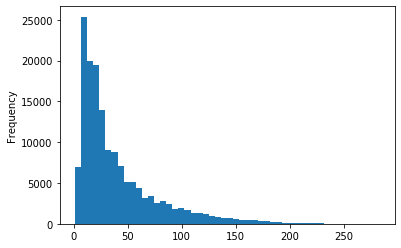

In [8]:
train['length'].plot(bins=50, kind='hist')

In [9]:
train.length.describe()

count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: length, dtype: float64

In [10]:
train[train['length'] == 283]['Phrase'].iloc[0]

"... spiced with humor -LRB- ' I speak fluent flatula , ' advises Denlopp after a rather , er , bubbly exchange with an alien deckhand -RRB- and witty updatings -LRB- Silver 's parrot has been replaced with Morph , a cute alien creature who mimics everyone and everything around -RRB-"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d86b9d0>,
      dtype=object)

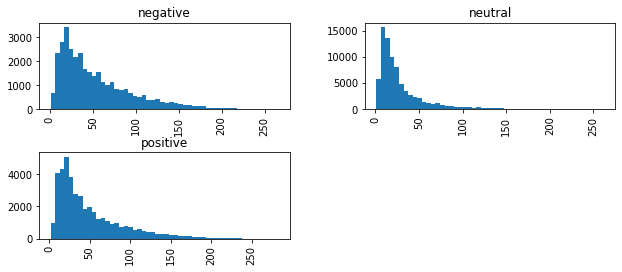

In [11]:
train.hist(column='length', by='Score', bins=50,figsize=(10,4))

In [12]:
# ***********************************************************************************
#       Stopping the Stop words
# ***********************************************************************************

nltk_stopwords = nltk.corpus.stopwords.words('english')
print('Number of stopwords: ',len(nltk_stopwords))
nltk_stopwords[:10]

Number of stopwords:  179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
# ***********************************************************************************
#       Stopping more Stop words
# ***********************************************************************************
more_stopwords = ['-rrb-','...','-lrb-','`','-',',','.','\'s','``','--','\'','n\'t','film','movie','films']
more_stopwords = nltk_stopwords + more_stopwords 
print('Number of stopwords: ',len(more_stopwords))
more_stopwords[:10]

Number of stopwords:  194


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def remove_stopword(x):
    return [y for y in x if y not in more_stopwords]
# train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [15]:
# ***********************************************************************************
#       Corpus/BOW Creation
# ***********************************************************************************
corpus=[]
for i in range(0,len(train)):
    review = re.sub('^[^a-z]+$', ' ', train['Phrase'][i] )
    review=review.lower()
    review=review.split()
    review=' '.join(review)
    corpus.append(review)  

In [16]:
corpus[:20]

['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'a series of escapades demonstrating the adage that what is good for the goose',
 'a series',
 '',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose',
 'demonstrating the adage',
 'demonstrating',
 'the adage',
 'the',
 'adage',
 'that what is good for the goose',
 'that',
 'what is good for the goose',
 'what',
 'is good for the goose']

In [17]:
# ***********************************************************************************
#       Tokenization - Word_Tokenize
# ***********************************************************************************
all_tokens = [tok for msg in corpus for tok in nltk.word_tokenize(msg)]
print('Number of tokens: ',len(all_tokens))
#print top 5 tokens
all_tokens[:10]

Number of tokens:  1124264


['a',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story',
 '.',
 'a',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the']

In [19]:
 #Top 30 words by frequency
msgFD = nltk.FreqDist(all_tokens)
top_words = msgFD.most_common(30)
for word, freq in top_words:
    print(word, freq) 

the 51220
, 42003
a 36117
of 32308
and 31763
to 22448
. 17957
's 16971
in 13745
is 13447
that 12327
it 11677
as 8623
with 7750
for 7417
its 7051
film 6688
an 6479
movie 5905
this 5677
but 5126
be 4977
you 4827
on 4730
n't 3970
by 3918
more 3888
his 3827
about 3682
one 3609
`` 3568
not 3562
at 3550
or 3472
from 3462
than 3458
-- 3355
all 3201
have 3134
like 3071
are 3059
has 2938
' 2919
so 2644
story 2520
-rrb- 2413
out 2372
who 2359
most 2227
into 2163


In [20]:
#apply stop words
filtered_sent=[]
for w in all_tokens:
    if w not in nltk_stopwords:
        filtered_sent.append(w)

In [21]:
 #Top 30 words by frequency
filteredmsgFD = nltk.FreqDist(filtered_sent)
fil_top_words = filteredmsgFD.most_common(30)
for word, freq in fil_top_words:
    print(word, freq) 

, 42003
. 17957
's 16971
film 6688
movie 5905
n't 3970
one 3609
`` 3568
-- 3355
like 3071
' 2919
story 2520
-rrb- 2413
-lrb- 2085
good 2043
` 1904
... 1883
characters 1882
much 1862
time 1747
comedy 1721
even 1597
little 1573
funny 1522
way 1511
life 1484
make 1396
movies 1345
love 1296
new 1278
enough 1248
work 1243
us 1218
bad 1211
something 1152
would 1118
never 1114
director 1099
many 1094
people 1073
made 1060
best 1059
two 1032
makes 1019
action 1005
may 986
plot 979
films 979
could 969
character 968


In [22]:
#apply more stop words
more_filtered=[]
for w in filtered_sent:
    if w not in more_stopwords:
        more_filtered.append(w)

In [23]:
 #Top 30 words by frequency
clean_reviewsFD = nltk.FreqDist(more_filtered)
clean_top_words = clean_reviewsFD.most_common(30)
for word, freq in clean_top_words:
    print(word, freq) 

one 3609
like 3071
story 2520
good 2043
characters 1882
much 1862
time 1747
comedy 1721
even 1597
little 1573
funny 1522
way 1511
life 1484
make 1396
movies 1345
love 1296
new 1278
enough 1248
work 1243
us 1218
bad 1211
something 1152
would 1118
never 1114
director 1099
many 1094
people 1073
made 1060
best 1059
two 1032
makes 1019
action 1005
may 986
plot 979
could 969
character 968
see 957
well 944
world 917
better 913
audience 912
drama 894
look 888
really 888
without 872
sense 869
every 849
great 838
humor 827
long 821


In [24]:
print(len(clean_reviewsFD))
print(len(corpus))

16387
156060


In [25]:
# move common words with frequency into temp df
temp = pd.DataFrame(clean_reviewsFD.most_common(30))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [26]:
#Commmon Words in Selected Text
fig = px.bar(temp, x="count", y="Common_words", title='Most common words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [27]:
#Tree of Most Common Words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [28]:
# ***********************************************************************************
#       Creating the Vectorized Bag of words Model
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=train.iloc[:,4].values

print("The time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

The start time is : 399.542576557
The time difference is : 2.0  seconds


In [29]:
#view depent variable
train.iloc[:,4][:10]

0    negative
1     neutral
2     neutral
3     neutral
4     neutral
5     neutral
6     neutral
7     neutral
8     neutral
9     neutral
Name: Score, dtype: object

In [30]:
# ***********************************************************************************
#       Splitting the dataset into the Training set and Test set
# ***********************************************************************************
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [38]:
# ***********************************************************************************
#       Random Forest classifier 
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)

# Fitting Random Forest classifier with 50 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
pipelineRF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
pipelineRF.fit(X_train, y_train)

print("The time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

The start time is : 3241.973487405
The time difference is : 5525.0  seconds


In [39]:

# ***********************************************************************************
#       Confusion Matrix & Classification Report
# ***********************************************************************************
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Predicting the Test set results
rf_predictions = pipelineRF.predict(X_test)
print(classification_report(rf_predictions,y_test))
print("-"*100)
print(confusion_matrix(rf_predictions,y_test))
print("-"*100)
print(pipelineRF.score(X_train,y_train))
print(accuracy_score(rf_predictions,y_test))


              precision    recall  f1-score   support

    negative       0.57      0.73      0.64      5463
     neutral       0.82      0.70      0.76     18754
    positive       0.63      0.74      0.68      6995

    accuracy                           0.71     31212
   macro avg       0.67      0.72      0.69     31212
weighted avg       0.73      0.71      0.72     31212

----------------------------------------------------------------------------------------------------
[[ 3966  1317   180]
 [ 2739 13123  2892]
 [  252  1542  5201]]
----------------------------------------------------------------------------------------------------
0.9059095860566448
0.7141484044598232


Feature ranking:


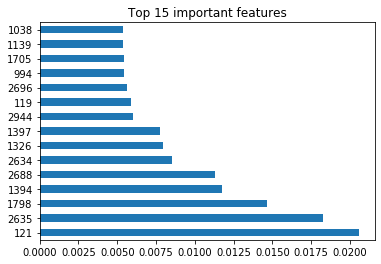

In [40]:
importances = pipelineRF.feature_importances_
std = np.std([tree.feature_importances_ for tree in pipelineRF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest

feat_importances = pd.Series(pipelineRF.feature_importances_)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [43]:
train.head()

traindf = train
traindf.head()

PhraseId  SentenceId  \
0         1           1   
1         2           1   
2         3           1   
3         4           1   
4         5           1   

                                                                                                                                                                                         Phrase  \
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .   
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose   
2                                                                                                                                                                                      A series   
3                                                                                                                                                                                             A   
4                                                                                                                                                                                        series   

   Sentiment     Score  length  
0          1  negative     188  
1          2   neutral      77  
2          2   neutral       8  
3          2   neutral       1  
4          2   neutral       6

In [42]:
# ***********************************************************************************
#       MultinomialNB & Classification Report
# ***********************************************************************************

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv  = TV(ngram_range =(1,1),max_features = 3000)
X_tv = tv.fit_transform(corpus).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier: ",acc,"\n")
# print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,y_pred))
# print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))

print(classification_report(y_pred,y_test))
print("-"*100)
print(confusion_matrix(y_pred,y_test))
print("-"*100,"\n")

print(classifier.score(X_train,y_train))
print(accuracy_score(y_pred,y_test))

Accuracy of the classifier:  0.6430539536075868 

              precision    recall  f1-score   support

    negative       0.27      0.75      0.39      2487
     neutral       0.91      0.61      0.73     23897
    positive       0.44      0.76      0.56      4828

    accuracy                           0.64     31212
   macro avg       0.54      0.70      0.56     31212
weighted avg       0.79      0.64      0.68     31212

----------------------------------------------------------------------------------------------------
[[ 1856   509   122]
 [ 4849 14556  4492]
 [  252   917  3659]]
---------------------------------------------------------------------------------------------------- 

0.6504950019223376
0.6430539536075868


In [75]:
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features

In [76]:
def cross_validation_PRF(num_folds, featuresets, labels):
    subset_size = int(len(featuresets)/num_folds)
    print('Each fold size:', subset_size)
    # for the number of labels - start the totals lists with zeroes
    num_labels = len(labels)
    total_precision_list = [0] * num_labels
    total_recall_list = [0] * num_labels
    total_F1_list = [0] * num_labels

    # iterate over the folds
    for i in range(num_folds):
        test_this_round = featuresets[(i*subset_size):][:subset_size]
        train_this_round = featuresets[:(i*subset_size)] + featuresets[((i+1)*subset_size):]
        # train using train_this_round
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        # evaluate against test_this_round to produce the gold and predicted labels
        goldlist = []
        predictedlist = []
        for (features, label) in test_this_round:
            goldlist.append(label)
            predictedlist.append(classifier.classify(features))

        # computes evaluation measures for this fold and
        #   returns list of measures for each label
        print('Fold', i)
        (precision_list, recall_list, F1_list) \
                  = eval_measures(goldlist, predictedlist, labels)
        # take off triple string to print precision, recall and F1 for each fold
        '''
        print('\tPrecision\tRecall\t\tF1')
        # print measures for each label
        for i, lab in enumerate(labels):
            print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
              "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))
        '''
        # for each label add to the sums in the total lists
        for i in range(num_labels):
            # for each label, add the 3 measures to the 3 lists of totals
            total_precision_list[i] += precision_list[i]
            total_recall_list[i] += recall_list[i]
            total_F1_list[i] += F1_list[i]

    # find precision, recall and F measure averaged over all rounds for all labels
    # compute averages from the totals lists
    precision_list = [tot/num_folds for tot in total_precision_list]
    recall_list = [tot/num_folds for tot in total_recall_list]
    F1_list = [tot/num_folds for tot in total_F1_list]
    # the evaluation measures in a table with one row per label
    print('\nAverage Precision\tRecall\t\tF1 \tPer Label')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))
    
    # print macro average over all labels - treats each label equally
    print('\nMacro Average Precision\tRecall\t\tF1 \tOver All Labels')
    print('\t', "{:10.3f}".format(sum(precision_list)/num_labels), \
          "{:10.3f}".format(sum(recall_list)/num_labels), \
          "{:10.3f}".format(sum(F1_list)/num_labels))

    # for micro averaging, weight the scores for each label by the number of items
    #    this is better for labels with imbalance
    # first intialize a dictionary for label counts and then count them
    label_counts = {}
    for lab in labels:
      label_counts[lab] = 0 
    # count the labels
    for (doc, lab) in featuresets:
      label_counts[lab] += 1
    # make weights compared to the number of documents in featuresets
    num_docs = len(featuresets)
    label_weights = [(label_counts[lab] / num_docs) for lab in labels]
    print('\nLabel Counts', label_counts)
    #print('Label weights', label_weights)
    # print macro average over all labels
    print('Micro Average Precision\tRecall\t\tF1 \tOver All Labels')
    precision = sum([a * b for a,b in zip(precision_list, label_weights)])
    recall = sum([a * b for a,b in zip(recall_list, label_weights)])
    F1 = sum([a * b for a,b in zip(F1_list, label_weights)])
    print( '\t', "{:10.3f}".format(precision), \
      "{:10.3f}".format(recall), "{:10.3f}".format(F1))

In [77]:
def eval_measures(gold, predicted, labels):
    
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []

    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        # for small numbers, guard against dividing by zero in computing measures
        if (TP == 0) or (FP == 0) or (FN == 0):
          recall_list.append (0)
          precision_list.append (0)
          F1_list.append(0)
        else:
          recall = TP / (TP + FP)
          precision = TP / (TP + FN)
          recall_list.append(recall)
          precision_list.append(precision)
          F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    return (precision_list, recall_list, F1_list)

In [117]:
# ***********************************************************************************
#       kaggle training file - pre processing for cross validation
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)

## function to read kaggle training file, train and test a classifier 
# def processkaggle(dirPath,limitStr):
#     # convert the limit argument from a string to an int
#     limit = int(limitStr)
#     os.chdir(dirPath)   
f = open('kagglemoviereviews/corpus/train.tsv', 'r')
# loop over lines in the file and use the first limit of them
phrasedata = []
for line in f:
# ignore the first line starting with Phrase and read all lines
    if (not line.startswith('Phrase')):
    # remove final end of line character
        line = line.strip()
    # each line has 4 items separated by tabs
    # ignore the phrase and sentence ids, and keep the phrase and sentiment
        phrasedata.append(line.split('\t')[2:4])
# possibly filter tokens
# lowercase - each phrase is a pair consisting of a token list and a label

#pick a random sample of length limit because of phrase overlapping sequences
random.shuffle(phrasedata)
phraselist = phrasedata[:len(phrasedata)]

print('Read', len(phrasedata), 'phrases, using', len(phraselist), 'random phrases')

# create list of phrase documents as (list of words, label)
phrasedocs = []
# add all the phrases

# each phrase has a list of tokens and the sentiment label (from 0 to 4)
### bin to only 3 categories for better performance
for phrase in phraselist:
    tokens = nltk.word_tokenize(phrase[0])
    phrasedocs.append((tokens, int(phrase[1])))

docs = []
for phrase in phrasedocs:
    lowerphrase = ([w.lower() for w in phrase[0]], phrase[1])
    docs.append (lowerphrase)

# # print a few
# for phrase in docs[:len(phrasedocs)]:
#     print (phrase)

# continue as usual to get all words and create word features
all_words_list = [word for (sent,cat) in docs for word in sent]
all_words = nltk.FreqDist(all_words_list)
print(len(all_words))

# get the 1500 most frequently appearing keywords in the corpus
word_items = all_words.most_common(1500)
word_features = [word for (word,count) in word_items]

# feature sets from a feature definition function
featuresets = [(document_features(d, word_features), c) for (d, c) in docs]

# train classifier and show performance in cross-validation
# make a list of labels
label_list = [c for (d,c) in docs]
labels = list(set(label_list))    # gets only unique labels

# starttime = timeit.default_timer()
# print("The start time is :",starttime)
# num_folds = 5
# cross_validation_PRF(num_folds, featuresets, labels)

print("\nThe time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

The start time is : 77536.076738523
Read 156060 phrases, using 156060 random phrases
16539

The time difference is : 252.0  seconds


In [118]:
# ***********************************************************************************
#       Cross-validation & Classification Report | 5 Fold
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)
num_folds = 5
cross_validation_PRF(num_folds, featuresets, labels)
print("\nThe time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

The start time is : 77788.322166559
Each fold size: 31212
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4

Average Precision	Recall		F1 	Per Label
0 	      0.318      0.250      0.280
1 	      0.267      0.405      0.322
2 	      0.825      0.639      0.720
3 	      0.280      0.475      0.352
4 	      0.296      0.391      0.337

Macro Average Precision	Recall		F1 	Over All Labels
	      0.397      0.432      0.402

Label Counts {0: 7072, 1: 27273, 2: 79582, 3: 32927, 4: 9206}
Micro Average Precision	Recall		F1 	Over All Labels
	      0.558      0.531      0.530

The time difference is : 4487.0  seconds


In [83]:
# ***********************************************************************************
#       Cross-validation & Classification Report | 10 Fold
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)
num_folds = 10
cross_validation_PRF(num_folds, featuresets, labels)
print("The time difference is :", round(timeit.default_timer() - starttime,0)," seconds")

The start time is : 30258.76564237
Each fold size: 15606
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9

Average Precision	Recall		F1 	Per Label
0 	      0.316      0.250      0.279
1 	      0.267      0.406      0.322
2 	      0.824      0.639      0.720
3 	      0.280      0.473      0.352
4 	      0.298      0.391      0.338

Macro Average Precision	Recall		F1 	Over All Labels
	      0.397      0.432      0.402

Label Counts {0: 7072, 1: 27273, 2: 79582, 3: 32927, 4: 9206}
Micro Average Precision	Recall		F1 	Over All Labels
	      0.558      0.531      0.530
The time difference is : 6326.0  seconds


## Summary

## Conclusion

## Next Steps

## References